# A Hybrid Quantum Genetic Algorithm
### by Giovanni Acampora and Autilia Vitiello
### Published in Elsevier Information Sciences

#### Abstract
HQGA is a new evolutionary algorithm implemented with the support of a real quantum processor, a computing device which uses phenomena from quantum mechanics to enable a considerable speed-up in computation. In particular, the proposed approach uses quantum superposition and entanglement to implement quantum evolutionary concepts such as quantum chromosome, entangled crossover, rotation mutation, and quantum elitism, to efficiently perform genetic evolution on quantum devices, and converge towards proper sub-optimal solutions of a given optimization problem. The proposed quantum genetic algorithm has been implemented by using a hybrid approach, where classical processors interact with the family of quantum processors provided by the IBM Quantum Experience project. This notebook allows researchers in quantum computing and artificial intelligence to test our proposal on a set of well-know benchmark function.

#### Importing Modules
The first step to run HQGA is to import the required Python modules.

In [1]:
from qiskit import IBMQ
from qiskit import Aer
from math import pi
import matplotlib.pyplot as plt

from HQGA import problems as p
from HQGA import hqga_algorithm
from HQGA import hqga_utils
from HQGA import utils


#### Setting the problem
The second step is to define the problem to be solved by HQGA. You can select among ten problems referred as to *Problem02* for test case F1, *Problem04* for test case F2, *Problem05* for test case F3, *Problem06* for test case F4, *Problem07* for test case F5, *Problem09* for test case F6, *Problem10* for test case F7, *Problem13* for test case F8, *Problem14* for test case F9 and *Problem15* for test case F10.

The variable *b* is used in the discretization procedure.

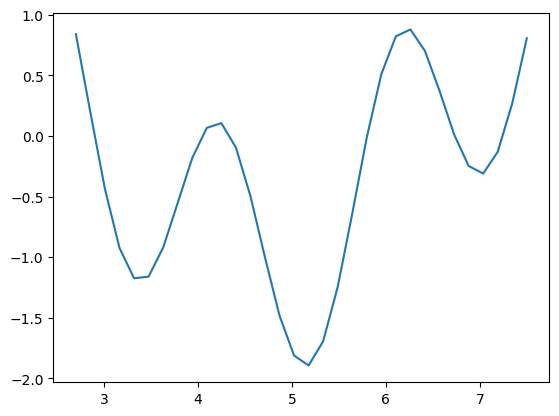

In [2]:
b = 5

# you can change the string Problem02 with another one among:
# Problem04, Problem05, Problem06, Problem07, Problem09, Problem10, Problem13, Problem14, Problem15

def display(problem):
 sols, gray_sols, fitnesses = problem.getWholeSpace()
 plt.plot(sols, fitnesses)

problem=p.Problem02(num_bit_code=b)
display(problem)

#### Defining the quantum backend
The third step is to define the quantum backed to be used to run HQGA. To use the IBM quantum hardware, it is necessary to have an IBM account. Please, create your account at the website https://quantum-computing.ibm.com/ and set the python variable named *account_token* to your token. However, it is possible also to simulate HQGA by using a quantum simulator. In this case, IBM account is not required. Please, set the variable *real_quantum_hardware* to True if you want use the real qauntum hardware, to keep it to False, if you want use the quantum simulator. It is worth noting that, the real quantum processor provided by IBM with a public access equipped with the greatest number of qubits is named *melbourne* (precisely 15 qubits). Therefore, we set this processor as real quantum backend.

<font color='red'>**ATTENTION: the real quantum processors are accessed by a cloud approach based on a fair queue strategy. Therefore, if you use real quantum harware, the execution of HQGA could need a lot of time.**</font>

In [3]:
real_quantum_hardware = False

if real_quantum_hardware:
    #load account
    account_token = ""
    IBMQ.save_account(account_token)
    IBMQ.load_account()
    provider = IBMQ.get_provider(group = 'open')
    backend = provider.get_backend('ibmq_16_melbourne')
else:
    backend = Aer.get_backend('aer_simulator')
device_features=hqga_utils.device(backend)

#### Setting HQGA hyperparameters
The fourth step is to set the hyper-parameters of HQGA. In this example, the number of chromosomes *k* is set to 3, the maximum number of iterations *max_gen* is set to 5, the $\delta$ value used during the initialization procedure is set to $\frac{\pi}{8}$, the $\mu$ value representing
the probability to apply the mutation is set to 0.3 and the $\rho$ value used when the reinforcement elitism is applied is set to $\frac{\pi}{16}$. The selected elitism is the quantum elitism. You can change the elitism strategy by setting the variable *elitism* to ELITISM_D for the deterministic elitism or to ELITISM_R for the quantum elitism with reinforcement.

In [4]:
#hyper-parameters in the case of the quantum elitism
k = 3
max_gen = 5
delta = pi/8
mu = 0.3
rho = pi/16
elitism = hqga_utils.ELITISM_Q

if elitism == hqga_utils.ELITISM_Q or elitism == hqga_utils.ELITISM_D:
    params = hqga_utils.Parameters(k,max_gen,delta,mu, elitism)
elif elitism == hqga_utils.ELITISM_R:
    params = hqga_utils.ReinforcementParameters(k,max_gen, delta, rho, mu)
else:
    print("Please, select one elitism procedure among ELITISM_Q, ELITISM_D and ELITISM_R")

#### Setting visualization parameters
This setting allows users to obtain the visualization of the circuits (*draw_circuit=True*), the visualization of the classical chromosomes and the relative fitness values (*verbose = True*) and, finally, the visualization of a progress bar to monitor the number of iterations (*progressBar = True*).

In [5]:
#presentation hyper-parameters
params.progressBar = True
params.verbose = True
params.draw_circuit = True

#### Setting up HQGA quantum circuit
The fifth step is to create an empty circuit with the required number of qubits.

In [6]:
# build circuit
circuit = hqga_utils.setupCircuit(params.pop_size, problem.dim * problem.num_bit_code)
#print(circuit)

#### Executing HQGA
The last step is to run HQGA. At the end of the execution, this code displays the best solution, the optimal solution to the problem and the Hamming distance among them in order to assess the quality of the generated solution.

In [7]:
# start test
gBest, chromosome_evolution, bests = hqga_algorithm.runQGA(device_features, circuit, params, problem)
print("Best solution",gBest.chr)
print("Optimal solutions",problem.getOptimum()[2])
for each_sol in problem.getOptimum()[2]:
    dis = utils.hamming_distance(gBest.chr, each_sol[0])
    print("Hamming distance", dis)

Generations:   0%|          | 0/6 [00:00<?, ?it/s]

      ┌───┐┌──────────┐ ░ ┌─┐                                          
q0_0: ┤ H ├┤ Ry(-π/8) ├─░─┤M├──────────────────────────────────────────
      ├───┤├──────────┤ ░ └╥┘┌─┐                                       
q0_1: ┤ H ├┤ Ry(-π/8) ├─░──╫─┤M├───────────────────────────────────────
      ├───┤├─────────┬┘ ░  ║ └╥┘┌─┐                                    
q0_2: ┤ H ├┤ Ry(π/8) ├──░──╫──╫─┤M├────────────────────────────────────
      ├───┤├─────────┴┐ ░  ║  ║ └╥┘┌─┐                                 
q0_3: ┤ H ├┤ Ry(-π/8) ├─░──╫──╫──╫─┤M├─────────────────────────────────
      ├───┤├──────────┤ ░  ║  ║  ║ └╥┘┌─┐                              
q0_4: ┤ H ├┤ Ry(-π/8) ├─░──╫──╫──╫──╫─┤M├──────────────────────────────
      ├───┤├─────────┬┘ ░  ║  ║  ║  ║ └╥┘┌─┐                           
q1_0: ┤ H ├┤ Ry(π/8) ├──░──╫──╫──╫──╫──╫─┤M├───────────────────────────
      ├───┤├─────────┴┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐                        
q1_1: ┤ H ├┤ Ry(-π/8) ├─░──╫──╫──╫──╫──╫──╫─┤M├─────────────────

Generations:  17%|█▋        | 1/6 [00:00<00:03,  1.27it/s]


Chromosomes ['11010', '00010', '00101']
Phenotypes: [[5.641935483870968], [3.164516129032258], [3.6290322580645165]]
Fitness values: [-0.6412884146897259, -0.9245884815156366, -0.9208916570136251]
Best fitness -0.9245884815156366 ; index best  1
                        ░ ┌───┐           ░             ░ ┌─┐                                          
q0_0: ──────────────────░─┤ X ├───────────░─────────────░─┤M├──────────────────────────────────────────
                        ░ └─┬─┘┌───┐      ░             ░ └╥┘┌─┐                                       
q0_1: ──────────────────░───┼──┤ X ├──────░─────────────░──╫─┤M├───────────────────────────────────────
                        ░   │  └─┬─┘┌───┐ ░             ░  ║ └╥┘┌─┐                                    
q0_2: ──────────────────░───┼────┼──┤ X ├─░─────────────░──╫──╫─┤M├────────────────────────────────────
      ┌───┐┌──────────┐ ░   │    │  └─┬─┘ ░             ░  ║  ║ └╥┘┌─┐                                 
q0_3: ┤ H ├┤ Ry(-π/8) ├─░

Generations:  33%|███▎      | 2/6 [00:01<00:02,  1.68it/s]


Chromosomes ['10011', '10001', '11101']
Phenotypes: [[7.190322580645161], [7.345161290322581], [6.106451612903227]]
Fitness values: [-0.13104453831022211, 0.2690331288583562, 0.822039665733065]
Best fitness -0.13104453831022211 ; index best  0
      ┌───┐┌─────────┐  ░                           ░              ░ ┌─┐                                          
q0_0: ┤ H ├┤ Ry(π/8) ├──░───■───────────────────────░──────────────░─┤M├──────────────────────────────────────────
      ├───┤├─────────┴┐ ░   │                       ░              ░ └╥┘┌─┐                                       
q0_1: ┤ H ├┤ Ry(-π/8) ├─░───┼────■──────────────────░──────────────░──╫─┤M├───────────────────────────────────────
      ├───┤├──────────┤ ░   │    │                  ░              ░  ║ └╥┘┌─┐                                    
q0_2: ┤ H ├┤ Ry(-π/8) ├─░───┼────┼────■─────────────░──────────────░──╫──╫─┤M├────────────────────────────────────
      ├───┤├──────────┤ ░   │    │    │             ░            

Generations:  50%|█████     | 3/6 [00:01<00:01,  1.72it/s]


Chromosomes ['00001', '00011', '11101']
Phenotypes: [[2.8548387096774195], [3.009677419354839], [6.106451612903227]]
Fitness values: [0.19161614058256682, -0.43926723851242405, 0.822039665733065]
Best fitness -0.43926723851242405 ; index best  1
                        ░ ┌───┐           ░              ░ ┌─┐                                          
q0_0: ──────────────────░─┤ X ├───────────░──────────────░─┤M├──────────────────────────────────────────
                        ░ └─┬─┘┌───┐      ░              ░ └╥┘┌─┐                                       
q0_1: ──────────────────░───┼──┤ X ├──────░──────────────░──╫─┤M├───────────────────────────────────────
                        ░   │  └─┬─┘┌───┐ ░              ░  ║ └╥┘┌─┐                                    
q0_2: ──────────────────░───┼────┼──┤ X ├─░──────────────░──╫──╫─┤M├────────────────────────────────────
      ┌───┐┌──────────┐ ░   │    │  └─┬─┘ ░              ░  ║  ║ └╥┘┌─┐                                 
q0_3: ┤ H ├┤ Ry(-π

Generations:  67%|██████▋   | 4/6 [00:02<00:00,  2.07it/s]


Chromosomes ['00101', '00110', '00010']
Phenotypes: [[3.6290322580645165], [3.3193548387096774], [3.164516129032258]]
Fitness values: [-0.9208916570136251, -1.1744519193161516, -0.9245884815156366]
Best fitness -1.1744519193161516 ; index best  1
                        ░ ┌───┐           ░              ░ ┌─┐                                          
q0_0: ──────────────────░─┤ X ├───────────░──────────────░─┤M├──────────────────────────────────────────
                        ░ └─┬─┘┌───┐      ░              ░ └╥┘┌─┐                                       
q0_1: ──────────────────░───┼──┤ X ├──────░──────────────░──╫─┤M├───────────────────────────────────────
                        ░   │  └─┬─┘┌───┐ ░              ░  ║ └╥┘┌─┐                                    
q0_2: ──────────────────░───┼────┼──┤ X ├─░──────────────░──╫──╫─┤M├────────────────────────────────────
      ┌───┐┌──────────┐ ░   │    │  └─┬─┘ ░              ░  ║  ║ └╥┘┌─┐                                 
q0_3: ┤ H ├┤ Ry(-

Generations:  83%|████████▎ | 5/6 [00:02<00:00,  2.06it/s]


Chromosomes ['10010', '10001', '00001']
Phenotypes: [[7.0354838709677425], [7.345161290322581], [2.8548387096774195]]
Fitness values: [-0.31060080552820335, 0.2690331288583562, 0.19161614058256682]
Best fitness -0.31060080552820335 ; index best  0
      ┌───┐┌─────────┐  ░                           ░              ░ ┌─┐                                          
q0_0: ┤ H ├┤ Ry(π/8) ├──░───■───────────────────────░──────────────░─┤M├──────────────────────────────────────────
      ├───┤├─────────┴┐ ░   │                       ░              ░ └╥┘┌─┐                                       
q0_1: ┤ H ├┤ Ry(-π/8) ├─░───┼────■──────────────────░──────────────░──╫─┤M├───────────────────────────────────────
      ├───┤├──────────┤ ░   │    │                  ░              ░  ║ └╥┘┌─┐                                    
q0_2: ┤ H ├┤ Ry(-π/8) ├─░───┼────┼────■─────────────░──────────────░──╫──╫─┤M├────────────────────────────────────
      ├───┤├──────────┤ ░   │    │    │             ░        

Generations: 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]


Chromosomes ['10000', '10000', '10001']
Phenotypes: [[7.5], [7.5], [7.345161290322581]]
Fitness values: [0.8056482266769659, 0.8056482266769659, 0.2690331288583562]
Best fitness 0.2690331288583562 ; index best  2
The best chromosome is:  00110
The best phenotype is:  [3.3193548387096774]
Its fitness value is:  -1.1744519193161516
The fitness evaluations to obtain the best:  12
The number of fitness evaluations is:  18
Best solution 00110
Optimal solutions [['11000']]
Hamming distance 4


<h1><center>QUASAR Laboratory. University of Naples Federico II.</center></h1>

In [1]:
!pip install HQGA

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.8 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.42.0-py3-none-any.whl size=12911 sha256=fcfe23400e4a6042e11b414aa90c164a06fd7a7a119403c3dc916bed1199bf5b
  Stored in directo